Training Random Forest...


c:\Users\34865\anaconda3\envs\cs178\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy: 0.5479
Random Forest Classification Report:

              precision    recall  f1-score   support

       <=50K       0.61      0.80      0.69      4936
      <=50K.       0.40      0.21      0.27      2478
        >50K       0.48      0.51      0.49      1562
       >50K.       0.24      0.11      0.15       793

    accuracy                           0.55      9769
   macro avg       0.43      0.41      0.40      9769
weighted avg       0.51      0.55      0.51      9769

Training Neural Network...


c:\Users\34865\anaconda3\envs\cs178\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\34865\anaconda3\envs\cs178\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Accuracy: 0.5342
Neural Network Classification Report:

              precision    recall  f1-score   support

       <=50K       0.61      0.76      0.68      4936
      <=50K.       0.38      0.23      0.29      2478
        >50K       0.48      0.49      0.48      1562
       >50K.       0.23      0.13      0.17       793

    accuracy                           0.53      9769
   macro avg       0.42      0.41      0.41      9769
weighted avg       0.50      0.53      0.51      9769

Training SVD + Random Forest...


c:\Users\34865\anaconda3\envs\cs178\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


SVD + Random Forest Accuracy: 0.5334
SVD + Random Forest Classification Report:

              precision    recall  f1-score   support

       <=50K       0.59      0.83      0.69      4936
      <=50K.       0.30      0.10      0.15      2478
        >50K       0.48      0.51      0.49      1562
       >50K.       0.22      0.07      0.10       793

    accuracy                           0.53      9769
   macro avg       0.40      0.38      0.36      9769
weighted avg       0.47      0.53      0.47      9769

Training SVD + Neural Network...


c:\Users\34865\anaconda3\envs\cs178\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVD + Neural Network Accuracy: 0.5593
SVD + Neural Network Classification Report:

              precision    recall  f1-score   support

       <=50K       0.58      0.92      0.71      4936
      <=50K.       0.29      0.01      0.02      2478
        >50K       0.49      0.54      0.51      1562
       >50K.       0.32      0.06      0.10       793

    accuracy                           0.56      9769
   macro avg       0.42      0.38      0.34      9769
weighted avg       0.47      0.56      0.46      9769



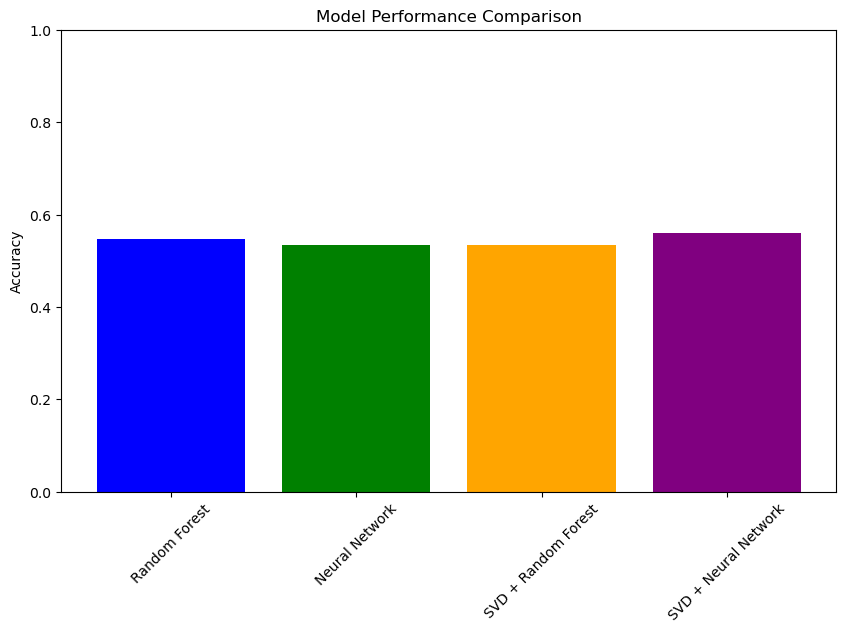

In [17]:
from ucimlrepo import fetch_ucirepo
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Step 1: Load the dataset
adult = fetch_ucirepo(id=2)
X = adult.data.features
y = adult.data.targets

# Step 2: Preprocessing
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 
                       'race', 'sex', 'native-country']
numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Preprocessing pipeline: scale numeric, encode categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

# Step 3: Model Pipelines
# Random Forest Model
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Neural Network Model
nn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42))
])

# SVD with Random Forest
svd_rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('reduce_dim', TruncatedSVD(n_components=10, random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# SVD with Neural Network
svd_nn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('reduce_dim', TruncatedSVD(n_components=10, random_state=42)),
    ('classifier', MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42))
])

# Step 4: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train and Evaluate Models
models = {
    "Random Forest": rf_model,
    "Neural Network": nn_model,
    "SVD + Random Forest": svd_rf_model,
    "SVD + Neural Network": svd_nn_model
}

results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

# Step 6: Visualize Results
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'orange', 'purple'])
plt.title("Model Performance Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()
